In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # 包更新的时候，先删除，再安装
import statsmodels.formula.api as smf
import statsmodels.api as sm # 建模库
from sklearn.preprocessing import StandardScaler



senborn的版本为: 0.11.2
pandas的版本为: 1.3.4


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_noLabel.csv')
print(train.columns) # 查看字段名称
print('-*'*40)
miss = missing(train) # 缺失值

Index(['ID', '位置', '出租方式', '区', '卧室数量', '卫的数量', '厅的数量', '地铁站点', '地铁线路', '小区名',
       '小区房屋出租数量', '居住状态', '总楼层', '房屋朝向', '房屋面积', '时间', '楼层', '装修情况', '距离',
       'Label'],
      dtype='object')
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
缺失值列: ['装修情况', '居住状态', '出租方式', '距离', '地铁站点', '地铁线路', '小区房屋出租数量', '区', '位置']


In [3]:
miss

,var_name,missing,per
0,装修情况,178047,90.59
1,居住状态,176401,89.75
2,出租方式,172309,87.67
3,距离,104761,53.30
4,地铁站点,104761,53.30
5,地铁线路,104761,53.30
6,小区房屋出租数量,1001,0.51
7,区,31,0.02
8,位置,31,0.02


In [66]:
# 删除缺失比例再50%以上的列
train1 = train.drop(columns=miss.query('missing_per>10')['index'].tolist())
test1 = test.drop(columns=miss.query('missing_per>10')['index'].tolist())
# train1 = train.dropna()
train1.describe()

,ID,位置,区,卧室数量,卫的数量,厅的数量,小区名,小区房屋出租数量,总楼层,房屋面积,时间,楼层,Label
count,196539.00,196508.00,196508.00,196539.00,196539.00,196539.00,196539.00,195538.00,196539.00,196539.00,196539.00,196539.00,196539.00
mean,98269.00,67.95,7.91,2.24,1.22,1.30,3224.12,124.15,40.87,131.39,2.12,0.96,7.95
std,56736.07,43.52,4.03,0.90,0.49,0.61,2023.07,133.30,18.31,81.04,0.79,0.85,6.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.81,0.00,0.00,1.00,0.00,0.00
25%,49134.50,33.00,4.00,2.00,1.00,1.00,1388.00,39.06,29.09,92.68,1.00,0.00,4.92
50%,98269.00,61.00,9.00,2.00,1.00,1.00,3086.00,82.03,41.82,129.10,2.00,1.00,6.62
75%,147403.50,103.00,11.00,3.00,1.00,2.00,5199.00,160.16,56.36,148.96,3.00,2.00,9.00
max,196538.00,152.00,14.00,11.00,8.00,8.00,6627.00,1000.00,100.00,10000.00,3.00,2.00,100.00


In [67]:
missing(train1)

,index,missing,per
0,小区房屋出租数量,1001,0.51
1,位置,31,0.02
2,区,31,0.02


In [68]:
train1=train1.set_index('ID')
train1.columns

Index(['位置', '区', '卧室数量', '卫的数量', '厅的数量', '小区名', '小区房屋出租数量', '总楼层', '房屋朝向',
       '房屋面积', '时间', '楼层', 'Label'],
      dtype='object')

In [69]:
train1.drop(columns=['小区名'], inplace=True)

In [70]:
train1 = train1.dropna()
train1.describe()

,位置,区,卧室数量,卫的数量,厅的数量,小区房屋出租数量,总楼层,房屋面积,时间,楼层,Label
count,195508.00,195508.00,195508.00,195508.00,195508.00,195508.00,195508.00,195508.00,195508.00,195508.00,195508.00
mean,67.93,7.91,2.24,1.22,1.30,124.15,40.93,131.36,2.11,0.96,7.95
std,43.51,4.02,0.90,0.49,0.61,133.30,18.29,81.10,0.79,0.85,6.31
min,0.00,0.00,0.00,0.00,0.00,7.81,0.00,0.00,1.00,0.00,0.00
25%,33.00,4.00,2.00,1.00,1.00,39.06,29.09,92.68,1.00,0.00,4.92
50%,61.00,9.00,2.00,1.00,1.00,82.03,41.82,129.10,2.00,1.00,6.62
75%,103.00,11.00,3.00,1.00,2.00,160.16,56.36,148.96,3.00,2.00,9.00
max,152.00,14.00,11.00,8.00,8.00,1000.00,100.00,10000.00,3.00,2.00,100.00


#### 房屋朝向对价格的影响

In [71]:
train1['房屋朝向'] = train1['房屋朝向'].str.strip()
# train1['toward_len'] = train1['房屋朝向'].str.replace(' ','').str.len()
train1['房屋朝向'].unique()

array(['东南', '东', '南', '东北', '西南', '南 北', '西北', '西', '北', '东南 西南 西',
       '东 南', '东 东南', '南 西南', '东南 西北', '东 西南', '东南 南 西南', '东 南 西',
       '西南 西北', '东 东北', '东南 南', '东 西', '南 东', '西南 西', '东南 西南', '南 西',
       '西南 北', '西 北', '北 东北', '西 西北', '东南 东北', '西北 东北', '西北 北', '西南 东北',
       '东 东南 南', '东南 西', '南 西北', '东 北', '南 东北', '东 南 北', '东 西 北',
       '东 东南 北', '西南 西 东北', '东南 南 北', '东 南 西 北', '东 西北', '东南 北',
       '东南 西南 西北', '东南 南 西南 西', '南 西 北', '南 西南 西', '东 西 东北', '东 东南 西南',
       '南 西南 北', '东 南 西北 北', '东 西北 北', '北 南', '西 西北 北', '东 东南 南 西南 西',
       '北 西', '南 北 东北', '东南 西 北', '东 西南 北', '东 南 西南', '南 西南 西 西北'],
      dtype=object)

In [72]:
train1.reset_index(inplace=True)

In [73]:
train1.head()

,ID,位置,区,卧室数量,卫的数量,厅的数量,小区房屋出租数量,总楼层,房屋朝向,房屋面积,时间,楼层,Label
0,0,118.0,11.0,1,1,1,128.91,23.64,东南,86.28,1,2,5.60
1,1,100.0,10.0,1,0,0,132.81,38.18,东,170.46,1,1,16.98
2,2,130.0,12.0,2,2,1,42.97,29.09,东南,105.93,1,0,9.00
3,3,90.0,7.0,3,2,2,85.94,58.18,南,191.99,1,2,5.60
4,4,31.0,3.0,2,1,1,214.84,54.55,东北,104.27,1,0,7.30


In [74]:
eda1 = train1.groupby(by='房屋朝向', as_index=False).agg(
            num1 = ('ID','count'),
            mean_p = ('Label', np.mean)
        ).sort_values(by='mean_p', ascending=False)
eda1.head()

,房屋朝向,num1,mean_p
10,东 南 西,11,30.61
45,南 西 北,11,27.46
49,南 西南 西,7,19.57
37,北 南,5,19.19
53,西 西北,87,15.16


In [75]:
def trans_fx(train1):
    '''
    对方向进行编码, 传入任何数据框，返回结果
    '''
    train1.eval(
        '''
        is_east = 0 
        is_west = 0
        is_south = 0
        is_north = 0
        south_east = 0
        south_west = 0
        north_east = 0
        north_west = 0
        ''', inplace=True
    )
    train1['is_east'] = train1['is_east'].mask(train1['房屋朝向'].str.contains('东'), 1)
    train1['is_west'] = train1['is_west'].mask(train1['房屋朝向'].str.contains('西'), 1)
    train1['is_south'] = train1['is_south'].mask(train1['房屋朝向'].str.contains('南'), 1)
    train1['is_north'] = train1['is_north'].mask(train1['房屋朝向'].str.contains('北'), 1)
    train1['south_east'] = train1['south_east'].mask(train1['房屋朝向'].str.contains('东南'), 1)
    train1['south_west'] = train1['south_west'].mask(train1['房屋朝向'].str.contains('西南'), 1)
    train1['north_east'] = train1['north_east'].mask(train1['房屋朝向'].str.contains('东北'), 1)
    train1['north_west'] = train1['north_west'].mask(train1['房屋朝向'].str.contains('西北'), 1)
    
    return train1

In [76]:
train1 = trans_fx(train1)
test1 = trans_fx(test1)

In [77]:
train1.sample(n=10, random_state=123)

,ID,位置,区,卧室数量,卫的数量,厅的数量,小区房屋出租数量,总楼层,房屋朝向,房屋面积,时间,楼层,Label,is_east,is_west,is_south,is_north,south_east,south_west,north_east,north_west
149148,150131,47.0,12.0,1,1,1,66.41,54.55,东,78.29,3,2,11.71,1,0,0,0,0,0,0,0
131360,132150,14.0,3.0,1,0,0,27.34,50.91,东,51.31,3,0,1.53,1,0,0,0,0,0,0,0
88329,88511,48.0,11.0,2,2,1,113.28,34.55,东,43.03,2,0,1.53,1,0,0,0,0,0,0,0
110239,110864,85.0,10.0,1,1,1,39.06,60.00,东南,65.38,2,0,4.24,1,0,1,0,1,0,0,0
20389,20405,37.0,6.0,4,2,1,11.72,38.18,西,235.02,1,2,11.71,0,1,0,0,0,0,0,0
76499,76664,17.0,13.0,3,1,2,148.44,29.09,西南,140.68,2,2,7.30,0,1,1,0,0,1,0,0
133597,134450,33.0,3.0,1,1,0,253.91,40.00,东南,69.51,3,0,3.90,1,0,1,0,1,0,0,0
99398,99715,109.0,0.0,1,1,1,97.66,29.09,东,84.41,2,0,4.58,1,0,0,0,0,0,0,0
152106,153097,29.0,11.0,2,1,1,78.12,58.18,东南,125.98,3,0,6.28,1,0,1,0,1,0,0,0
151197,152187,57.0,6.0,4,1,1,105.47,54.55,西南,264.81,3,1,20.88,0,1,1,0,0,1,0,0


In [78]:
def groupby_col(df, col):
    '''
    -   传入分类便利名col
    -   传出每个类别数量；平均值
    '''
    eda = df.groupby(by=[col], as_index=False).agg(
            num1 = ('ID','count'),
            mean_p = ('Label', np.mean)
        ).sort_values(by='mean_p', ascending=False)
    return eda

In [79]:
columns = [
    'is_east', 'is_west','is_south', 'is_north','south_east', 'south_west', 'north_east', 'north_west',
    '楼层', '时间', '区', '卧室数量', '卫的数量', '厅的数量'
] 
for col in columns:
    print('-'*50)
    print(f'按照变量 {col} 分组: ')
    eda = groupby_col(train1, col)
    print(eda)

--------------------------------------------------
按照变量 is_east 分组: 
   is_east  num1    mean_p
0  0        102415  8.39  
1  1         93093  7.47  
--------------------------------------------------
按照变量 is_west 分组: 
   is_west  num1    mean_p
1  1         35085  8.04  
0  0        160423  7.93  
--------------------------------------------------
按照变量 is_south 分组: 
   is_south  num1    mean_p
0  0          61621  8.02  
1  1         133887  7.92  
--------------------------------------------------
按照变量 is_north 分组: 
   is_north  num1    mean_p
1  1          23996  8.72  
0  0         171512  7.84  
--------------------------------------------------
按照变量 south_east 分组: 
   south_east  num1    mean_p
0  0           139094  8.22  
1  1            56414  7.30  
--------------------------------------------------
按照变量 south_west 分组: 
   south_west  num1    mean_p
0  0           176935  7.99  
1  1            18573  7.60  
--------------------------------------------------
按照变量 north_east 分

#### 连续变量，OLS回归初探

In [80]:
# 卧室数量
res=smf.ols('Label~位置+卧室数量+卫的数量+厅的数量', data=train1).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Label   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:30:20   Log-Likelihood:            -6.1704e+05
No. Observations:              195508   AIC:                         1.234e+06
Df Residuals:                  195503   BIC:                         1.234e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2518      0.045      5.618      0.0

#### 分类变量

In [81]:
print(columns)

['is_east', 'is_west', 'is_south', 'is_north', 'south_east', 'south_west', 'north_east', 'north_west', '楼层', '时间', '区', '卧室数量', '卫的数量', '厅的数量']


In [82]:
res=smf.ols(
    'Label~位置+卧室数量+卫的数量+厅的数量+C(楼层) \
        +C(is_east)+C(is_west)+C(is_south)+C(is_north) \
        +C(south_east)+C(north_east)+C(north_west)+C(south_west)'
    , data=train1
).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Label   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     3394.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:30:26   Log-Likelihood:            -6.1626e+05
No. Observations:              195508   AIC:                         1.233e+06
Df Residuals:                  195493   BIC:                         1.233e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0877      0

In [83]:
train1.tail()

,ID,位置,区,卧室数量,卫的数量,厅的数量,小区房屋出租数量,总楼层,房屋朝向,房屋面积,时间,楼层,Label,is_east,is_west,is_south,is_north,south_east,south_west,north_east,north_west
195503,196534,71.0,12.0,4,2,1,78.12,56.36,西南,238.33,3,1,17.49,0,1,1,0,0,1,0,0
195504,196535,28.0,7.0,3,2,2,15.62,30.91,东南,162.20,3,0,5.60,1,0,1,0,1,0,0,0
195505,196536,86.0,9.0,1,1,0,218.75,38.18,南,41.31,3,1,2.89,0,0,1,0,0,0,0,0
195506,196537,33.0,3.0,1,1,0,46.88,38.18,西,44.69,3,1,2.21,0,1,0,0,0,0,0,0
195507,196538,59.0,6.0,2,1,1,27.34,29.09,南,103.10,3,2,10.70,0,0,1,0,0,0,0,0


In [84]:
res=smf.ols(
    'Label~位置+卧室数量+卫的数量+厅的数量+区+小区房屋出租数量 \
        +C(楼层)+C(is_east)+C(is_west)+C(is_south)+C(is_north) \
        +C(south_east)+C(north_east)+C(north_west)+C(south_west) '
    , data=train1
).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Label   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     3483.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:30:32   Log-Likelihood:            -6.1301e+05
No. Observations:              195508   AIC:                         1.226e+06
Df Residuals:                  195491   BIC:                         1.226e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.6555      0

In [85]:
train1 = train1.select_dtypes(exclude=['object'])
test1 = test1.select_dtypes(exclude=['object'])
# train1.describe()

In [89]:
test1.columns

Index(['ID', '位置', '区', '卧室数量', '卫的数量', '厅的数量', '小区名', '小区房屋出租数量', '总楼层',
       '房屋面积', '时间', '楼层', 'is_east', 'is_west', 'is_south', 'is_north',
       'south_east', 'south_west', 'north_east', 'north_west'],
      dtype='object')

In [92]:
# test1.iloc[:,1:] #去掉ID的所有列
test1.set_index('ID',inplace=True)
res.predict(exog=test1)

ID
196539     7.84
196540     5.63
196541    12.34
196542     6.26
196543     5.52
196544     9.57
196545     7.82
196546     6.24
196547    12.58
196548     7.95
          ...  
252808     5.57
252809     9.27
252810     7.78
252811     6.38
252812     4.38
252813     7.37
252814    11.98
252815     6.82
252816     6.53
252817     3.28
Length: 56279, dtype: float64

In [96]:
out = res.predict(exog=test1)
type(out)

pandas.core.series.Series

In [100]:
missing(test1)

,index,missing,per
0,小区房屋出租数量,22,0.01
1,位置,10,0.01
2,区,10,0.01


In [101]:
outs = pd.DataFrame(out, columns=['Label'])
outs.reset_index(inplace=True)
outs.fillna(np.mean(outs.Label), inplace=True)
outs.to_csv('ols_out1.csv', index=False)
outs.head()

,ID,Label
0,196539,7.84
1,196540,5.63
2,196541,12.34
3,196542,6.26
4,196543,5.52


In [37]:
X_train = train1.drop(columns=['Label'])
y_train = train1[['Label']]
print(X_train.shape)
print(y_train.shape)

(195508, 19)
(195508, 1)


In [ ]:
print(train1.columns)
print(test1.columns)

#### 关于数据标准化的一些说明

In [39]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
y_train_norm = scaler.fit_transform(y_train) #Y值可以不用变量变换


In [40]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler1 = StandardScaler()
scaler1.fit_transform(data) # 通过fit_transform，对训练集自变量进行标准化后，获得了均值，标准差

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [41]:
print(scaler1.mean_)
print(scaler1.var_) 

[0.5 0.5]
[0.25 0.25]


In [42]:
scaler1.transform([[2,2]]) # (2-0.5)/0.25^(1/2) 

array([[3., 3.]])

#### Y和X的信息

In [43]:
# print(X_train_norm.describe())
y_train.head()

,Label
0,5.60
1,16.98
2,9.00
3,5.60
4,7.30


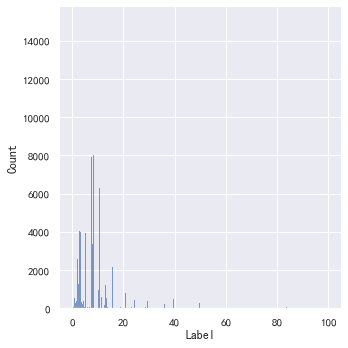

In [44]:
sns.displot(data=y_train, x='Label')

In [45]:
y_train['lny'] = np.log(y_train['Label'])

C:\Softwares\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-45-39c75256fb08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['lny'] = np.log(y_train['Label'])


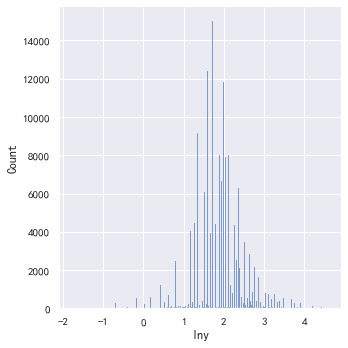

In [46]:
sns.displot(data=y_train, x='lny')

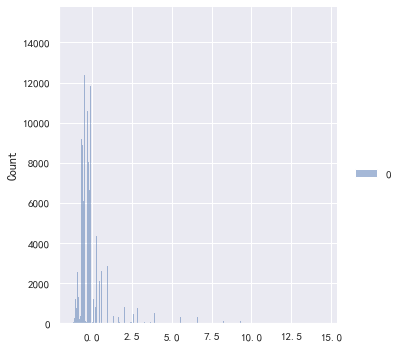

In [47]:
sns.displot(data=y_train_norm)